### 1) Recreate Scatterplot from Gapminder Notebook

In [1]:
# load data

import pandas as pd

fert = pd.read_csv('/home/denniss/Downloads/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('/home/denniss/Downloads/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('/home/denniss/Downloads/gapminder_population.xlsx', index_col=0)

In [2]:
# change data type of year columns from str to int

ncol = [int(x) for x in fert.columns]

fert.set_axis(axis=1, labels=ncol, inplace=True)

In [3]:
# create wide tables

sfert = fert.stack()
slife = life.stack()
spop = pop.stack()

In [4]:
# put data together in one DataFrame

d = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df = pd.DataFrame(data=d)

In [5]:
# show pop in millions

df['pop_in_mill'] = df['population'] / 1000000
df = df.drop(columns=['population'])
df

fertility  lifeexp  pop_in_mill
Afghanistan 1800        7.0    28.21     3.280000
            1801        7.0    28.20          NaN
            1802        7.0    28.19          NaN
            1803        7.0    28.18          NaN
            1804        7.0    28.17          NaN
...                     ...      ...          ...
Åland       2006        NaN    80.10     0.026923
            2007        NaN      NaN     0.026923
            2008        NaN      NaN     0.026923
            2009        NaN      NaN     0.026923
            2010        NaN      NaN     0.026923

[47688 rows x 3 columns]

In [6]:
# stacking and unstacking

df2 = df.stack()
df3 = df2.unstack(1)
df3 = df3[1950]
df3 = df3.unstack(1)
df3

,fertility,lifeexp,pop_in_mill
Afghanistan,7.67,26.85,7.752118
Akrotiri and Dhekelia,NaN,NaN,0.010661
Albania,5.80,54.48,1.263171
Algeria,7.65,42.77,8.872247
American Samoa,NaN,NaN,0.018937
...,...,...,...
Yemen,7.27,23.51,4.402320
Yugoslavia,NaN,NaN,16.285527
Zambia,6.71,42.85,2.316950
Zimbabwe,6.75,48.46,2.746854


([<matplotlib.axis.YTick at 0x7fe4cf507f90>,
 <a list of 10 Text yticklabel objects>)

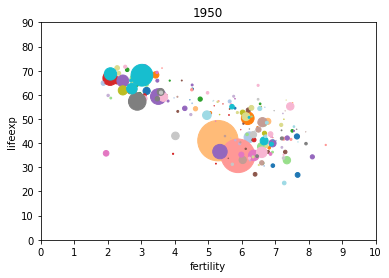

In [7]:
# customize plot
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab20', lut = len(df3)).colors # add colormap
df3.plot.scatter('fertility', 'lifeexp', s=df3['pop_in_mill'] * 3, c=cmap)
plt.title(f'1950') # Add year to title
plt.xticks(list(range(0, 11))) # Fix ticks, so they don't jump around
plt.yticks(list(range(0, 100, 10))) # Fix ticks

### 2) Bar plots for average life expectancy and fertility rate

In [8]:
# Calculate example mean for 1950

l_mean = df3['lifeexp'].mean()
f_mean = df3['fertility'].mean()
l_mean, f_mean

(49.25975247524753, 5.433532338308462)

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


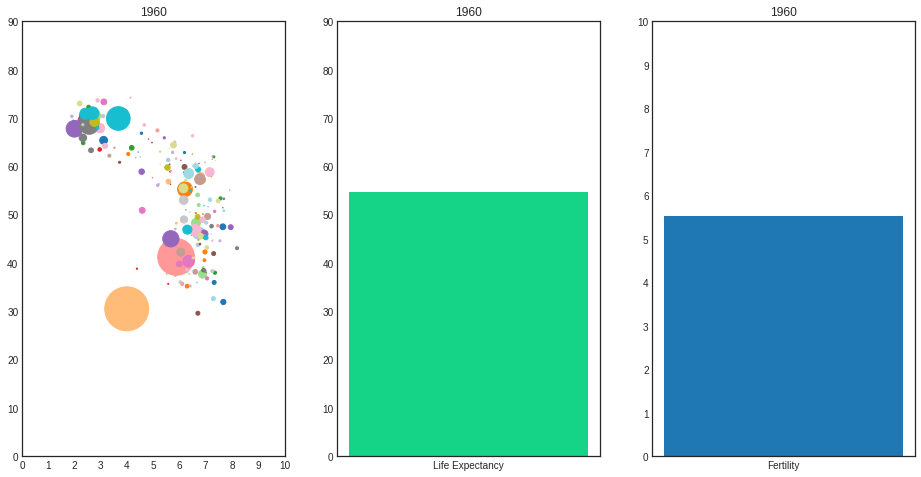

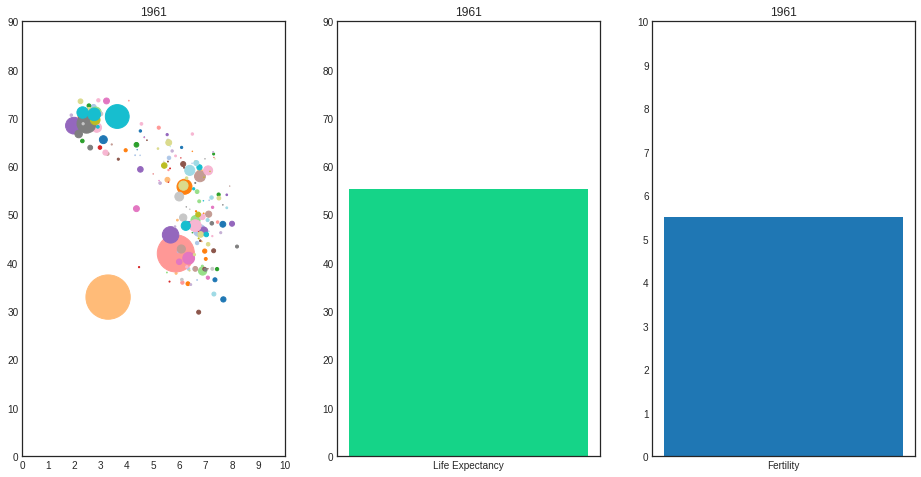

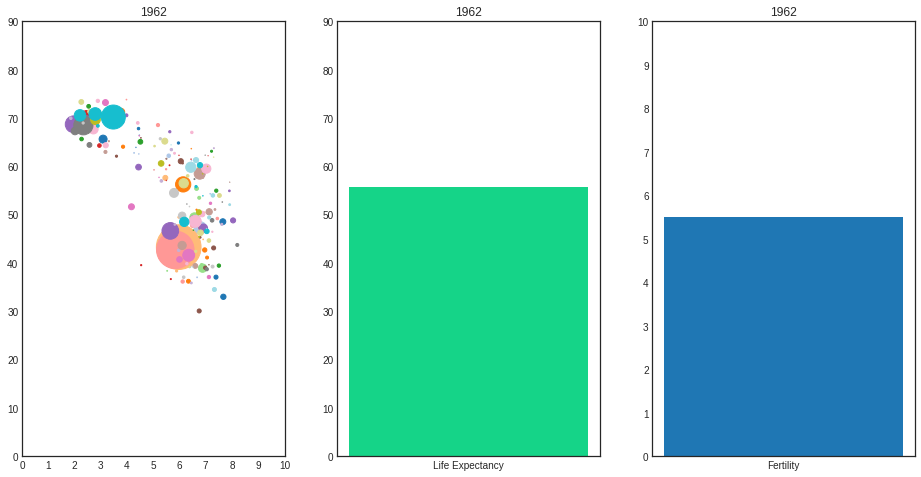

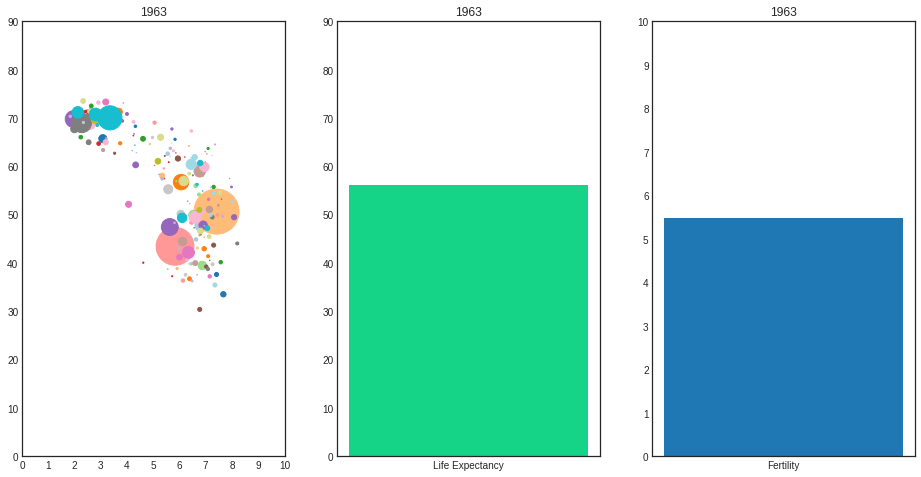

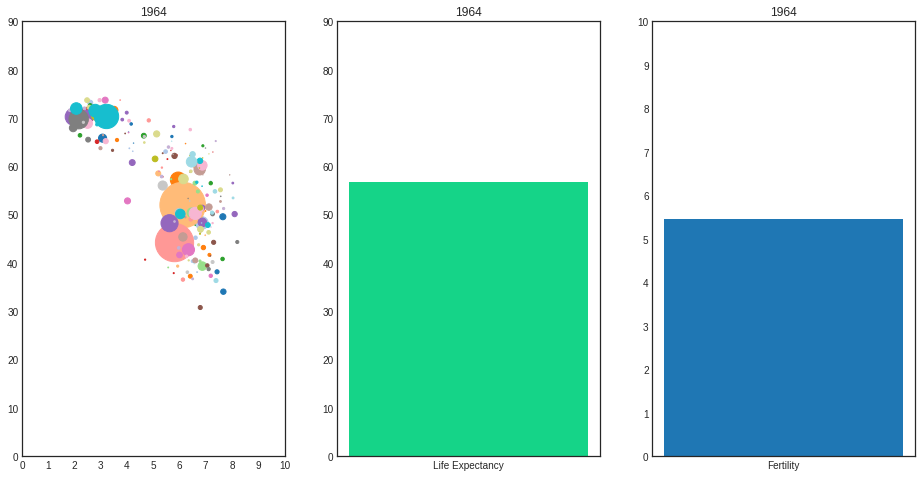

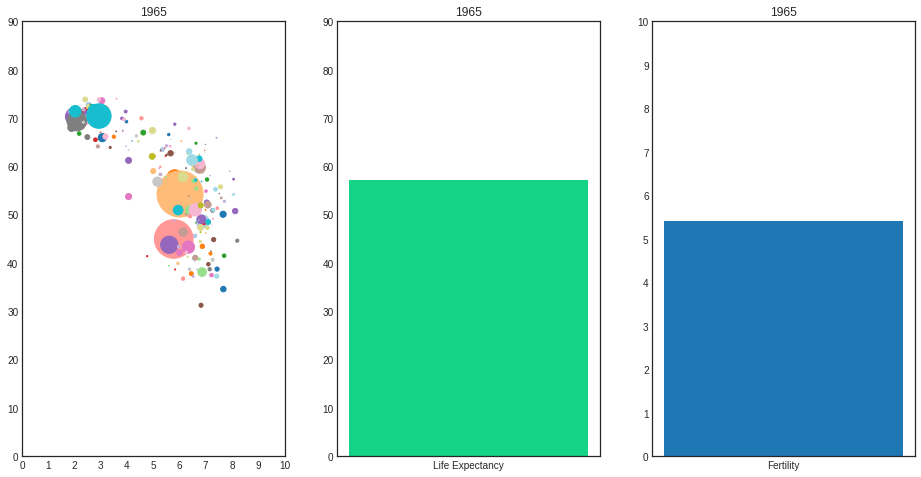

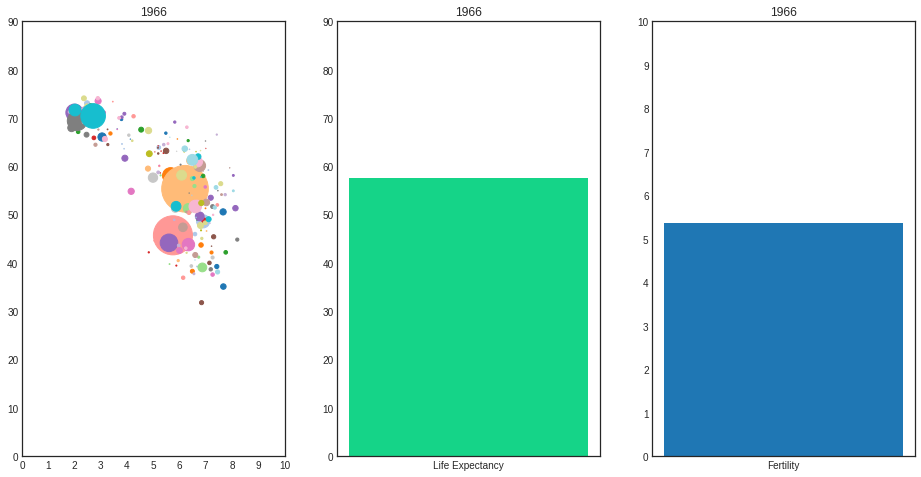

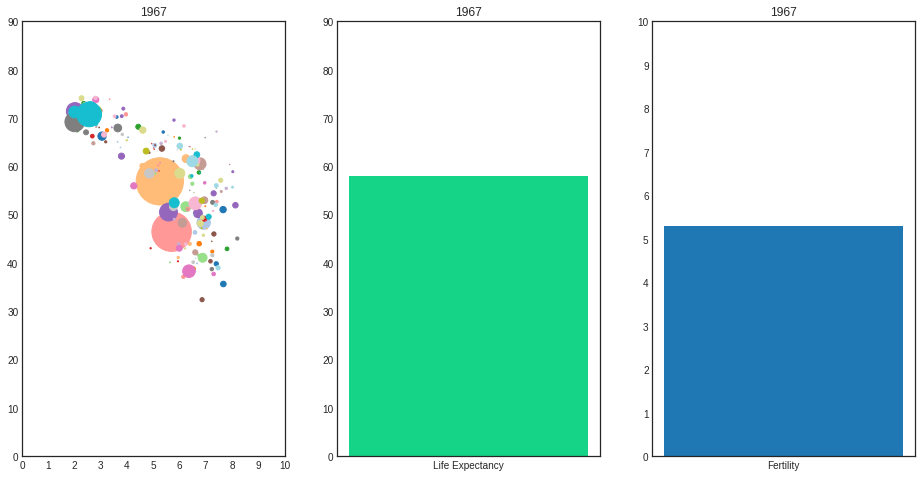

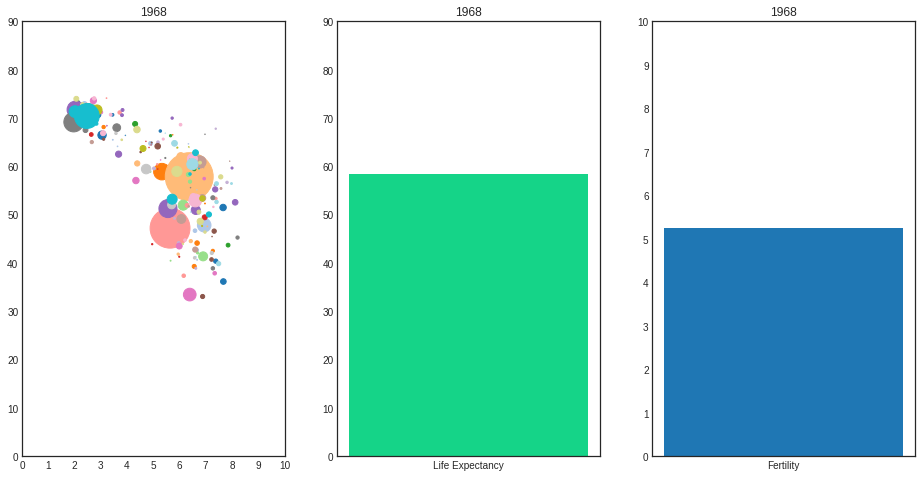

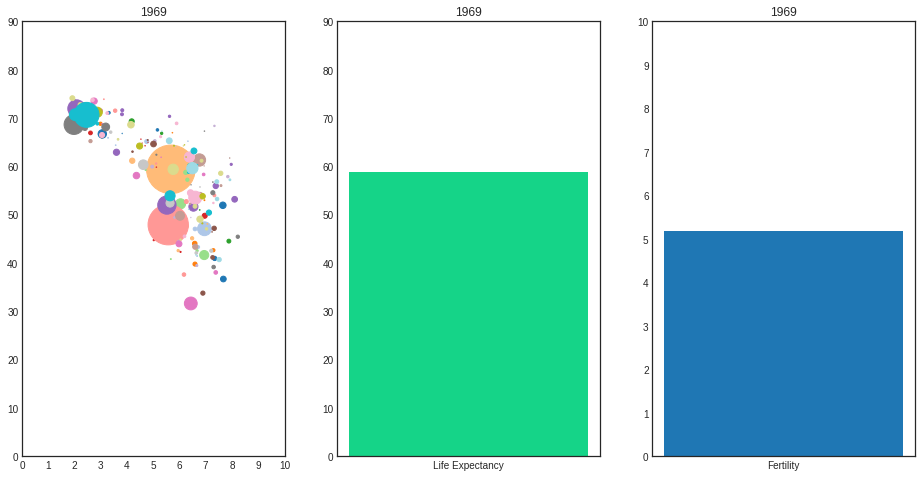

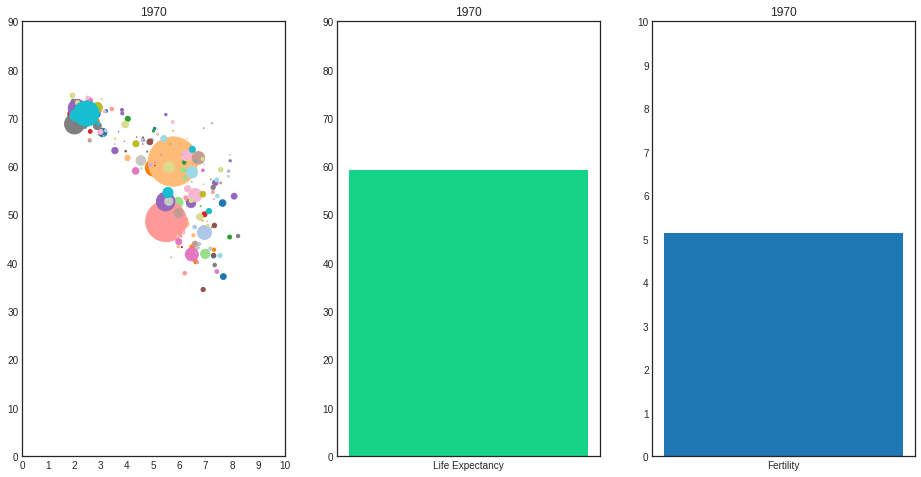

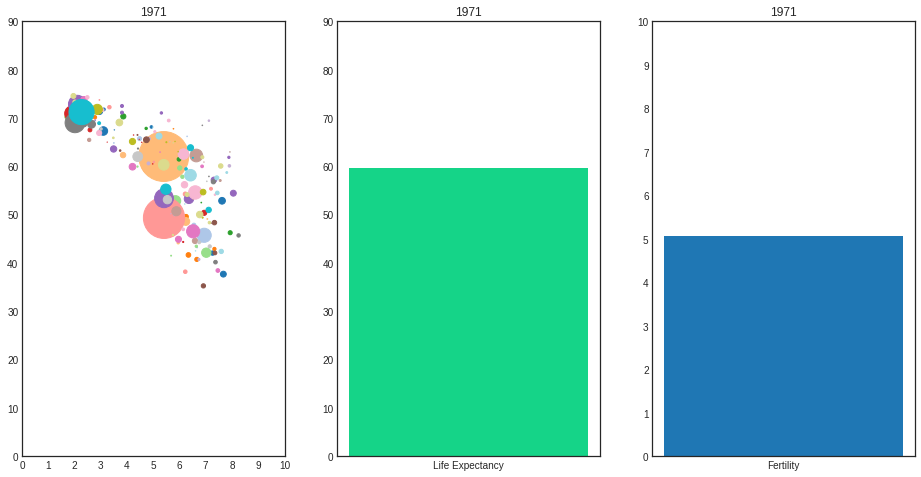

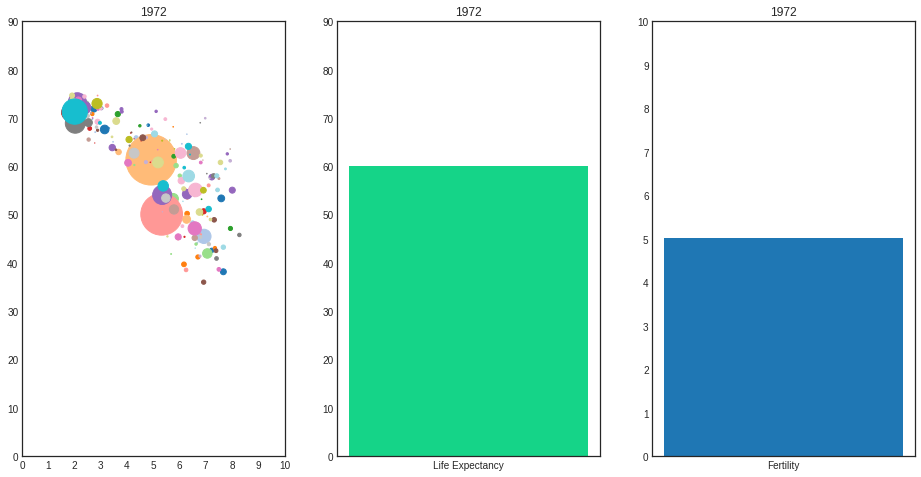

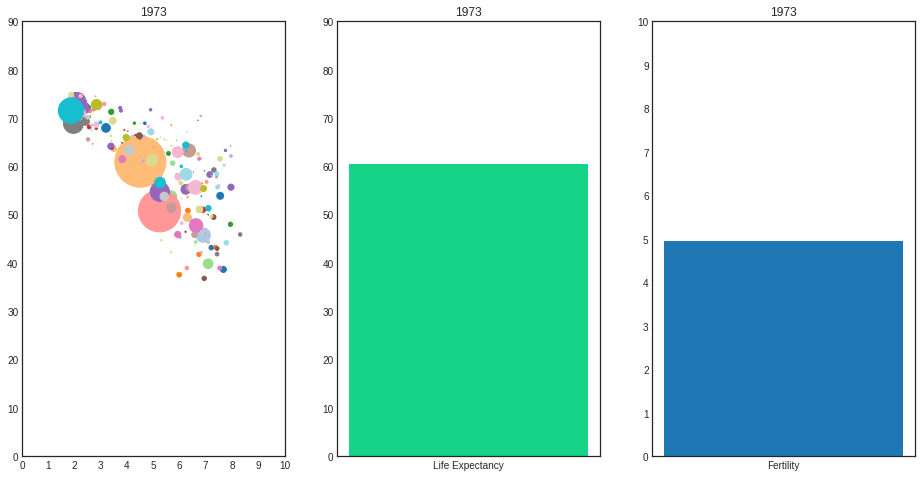

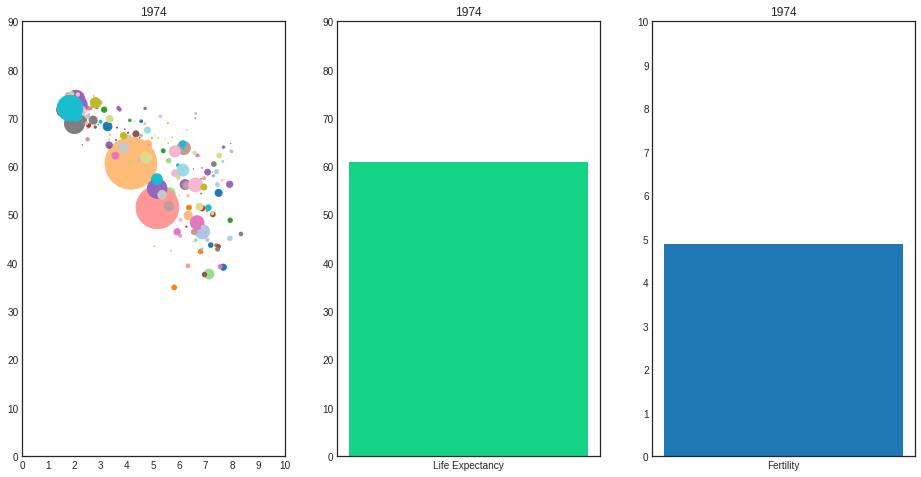

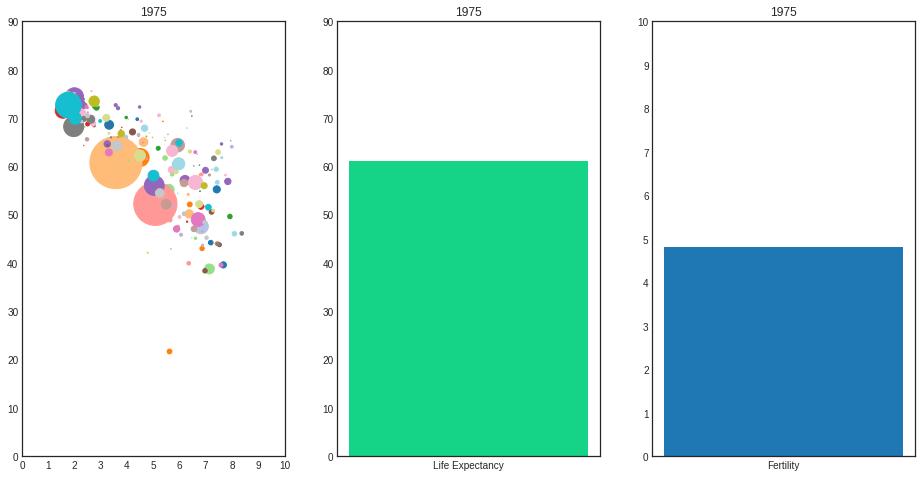

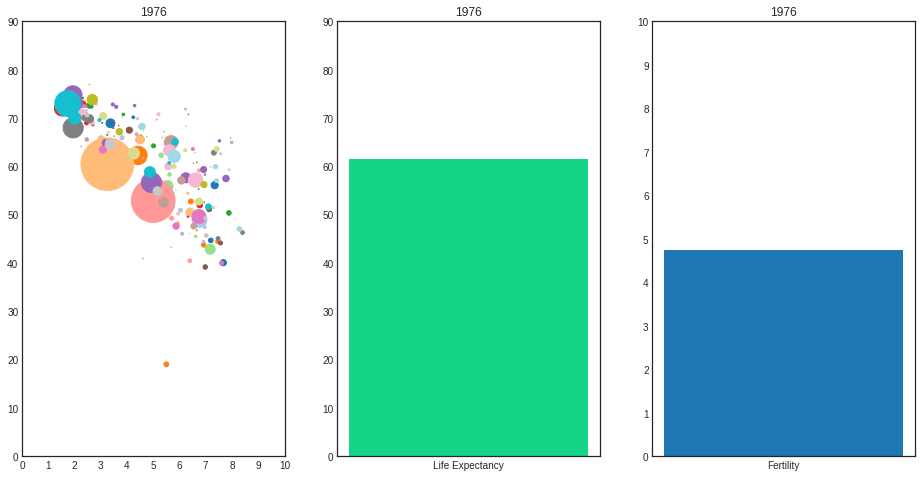

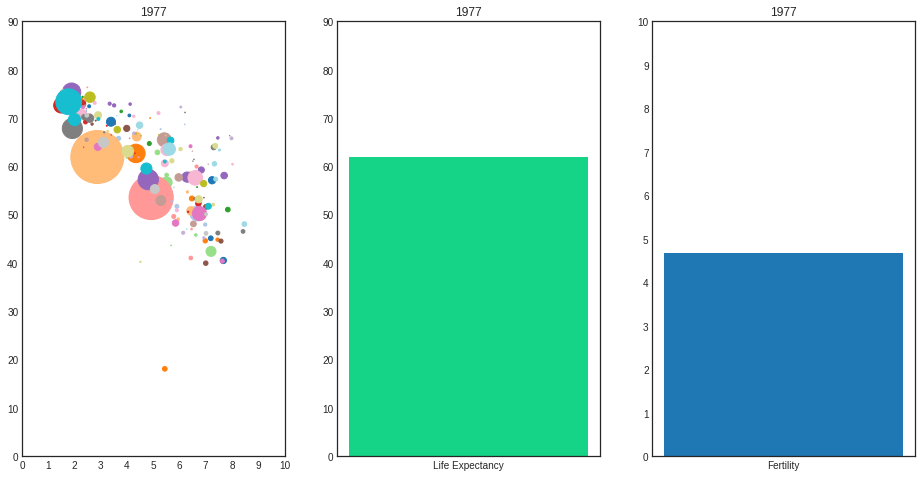

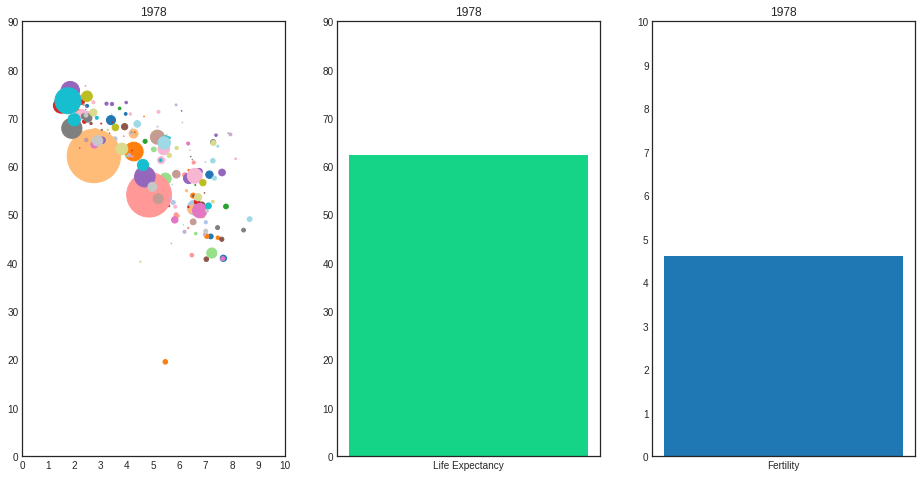

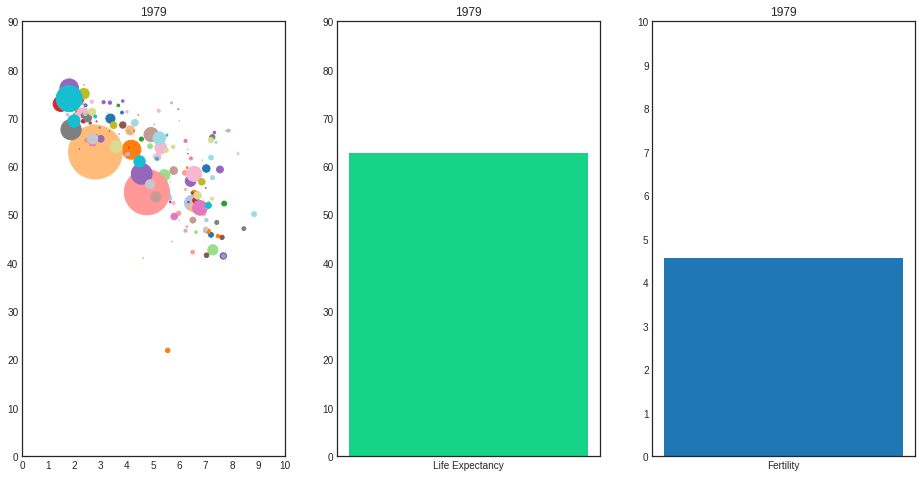

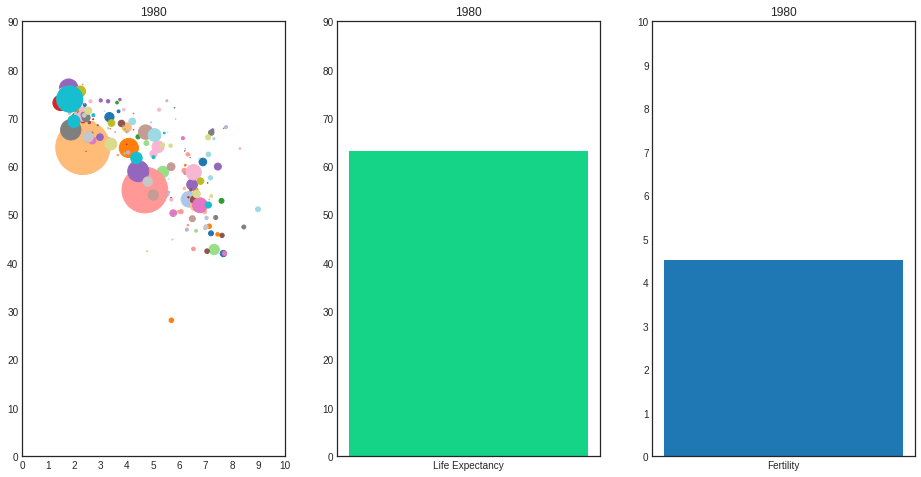

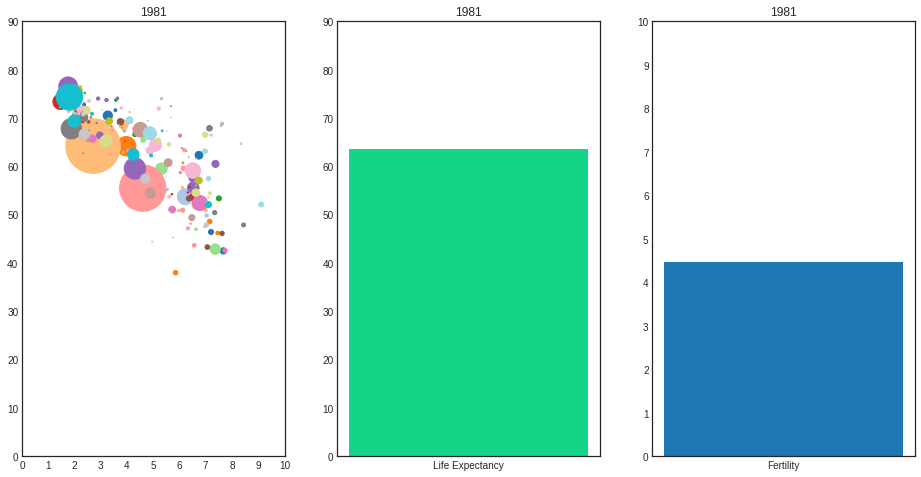

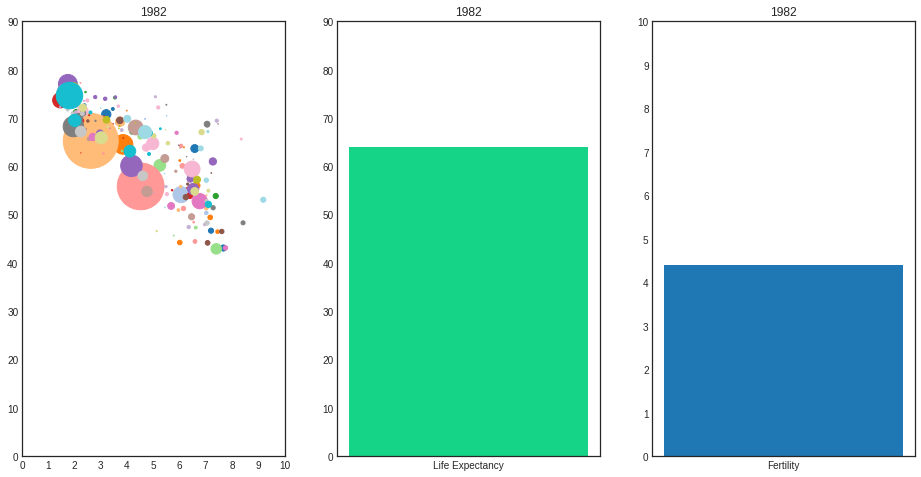

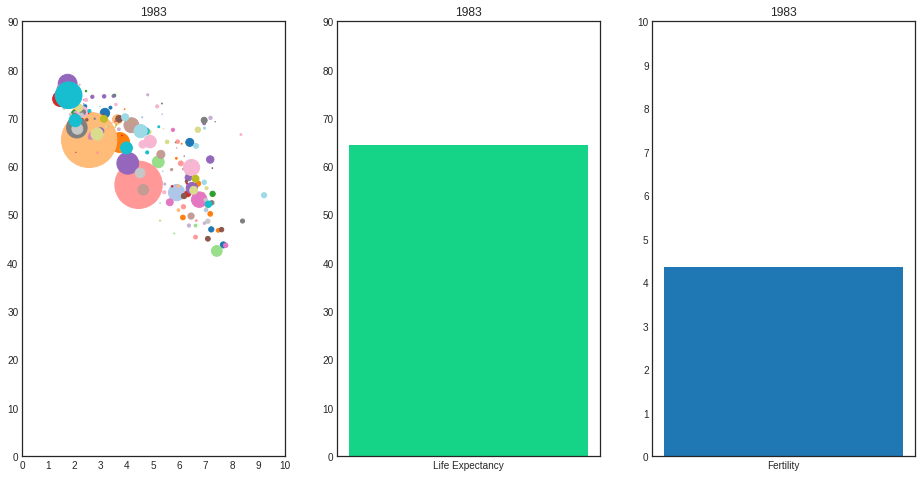

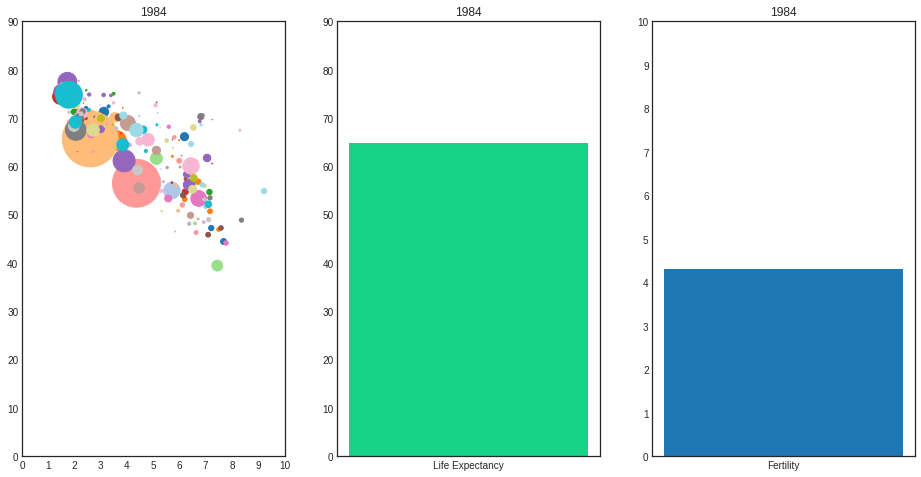

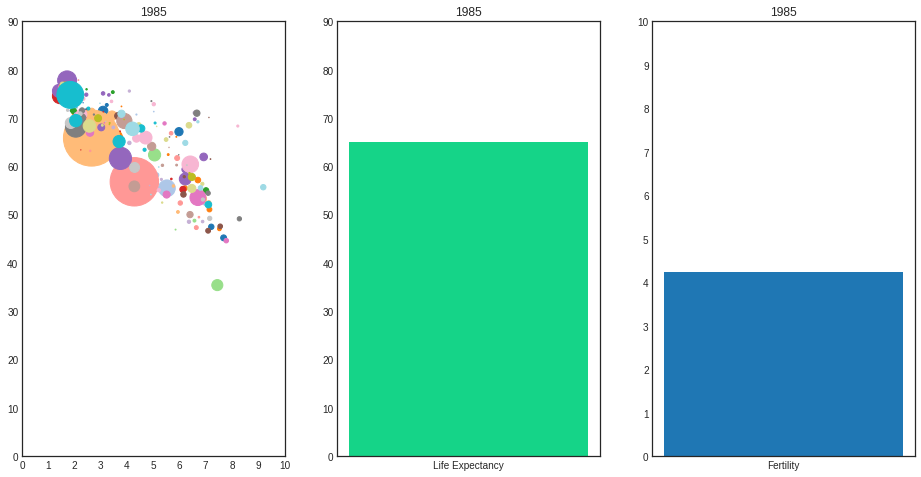

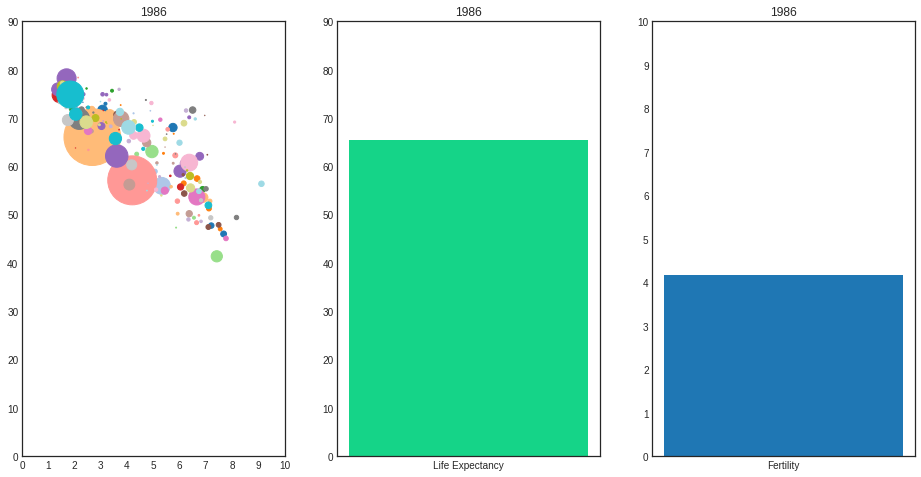

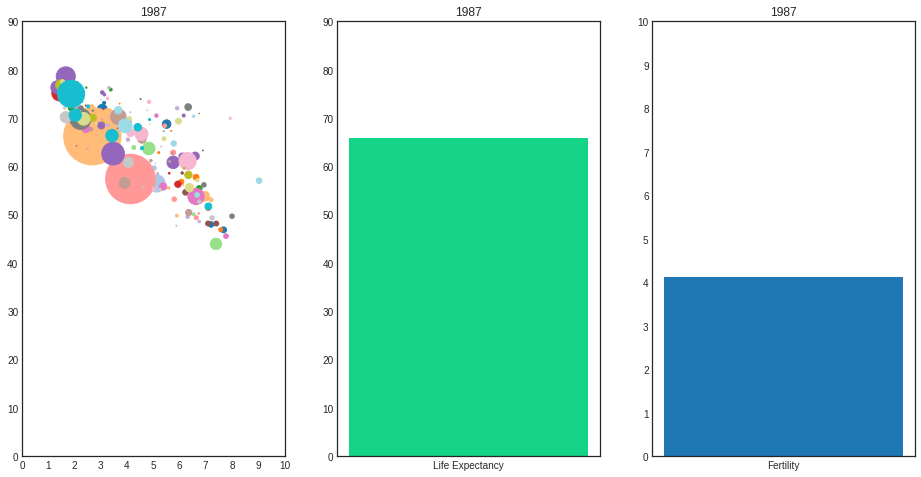

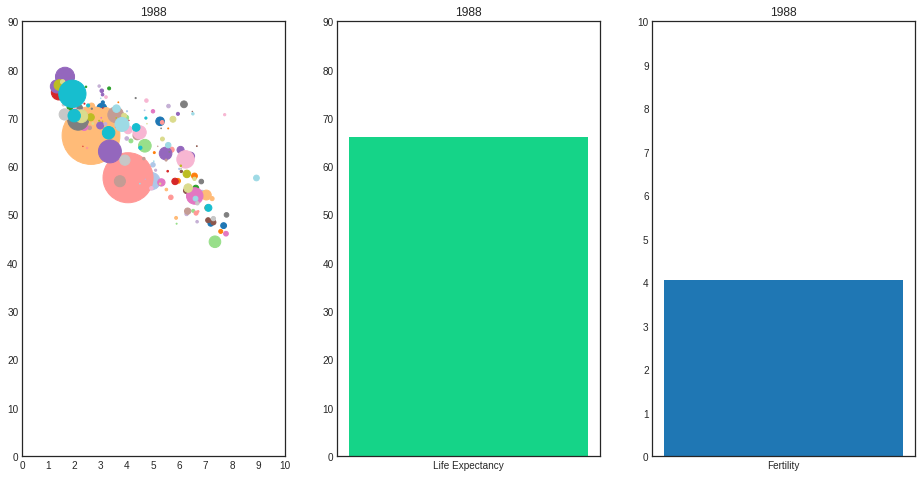

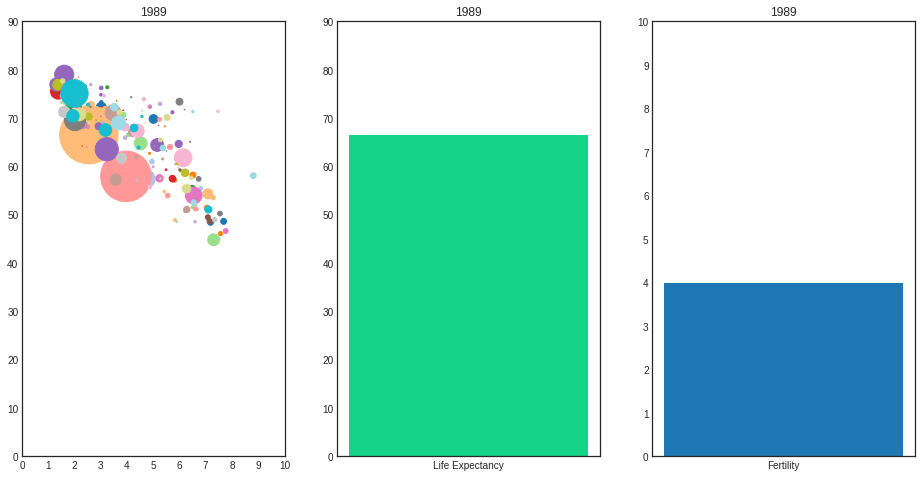

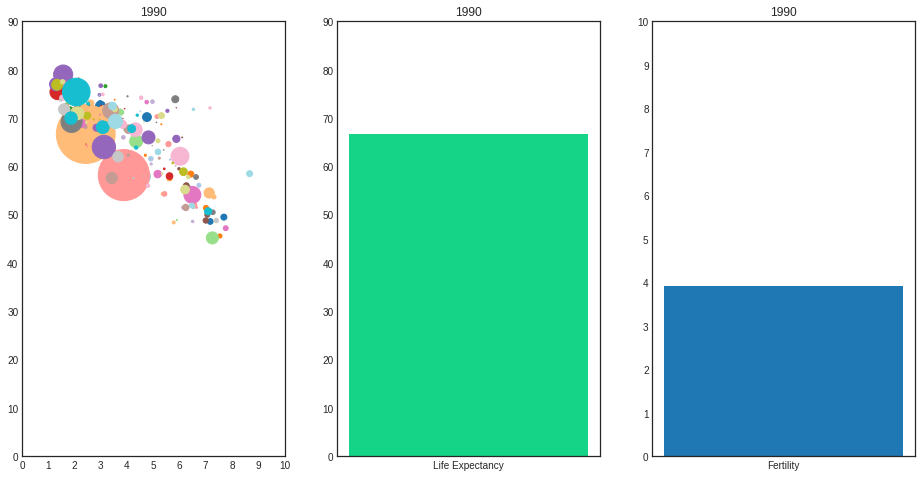

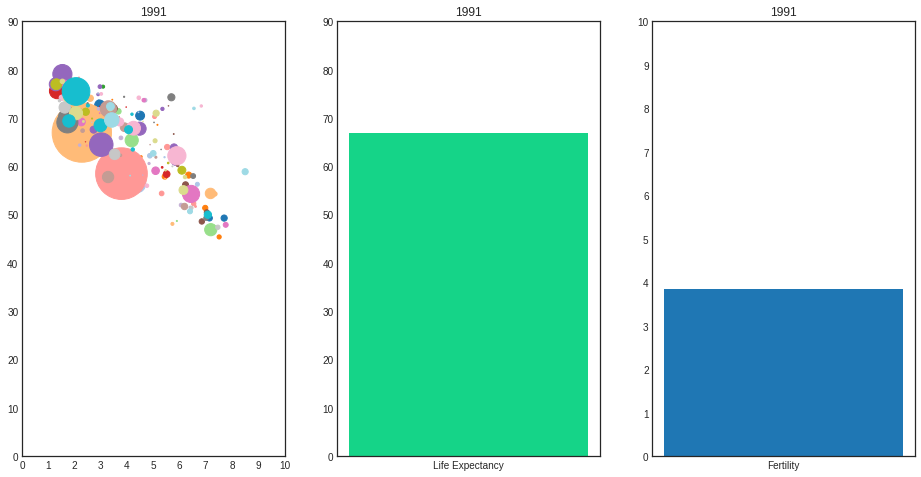

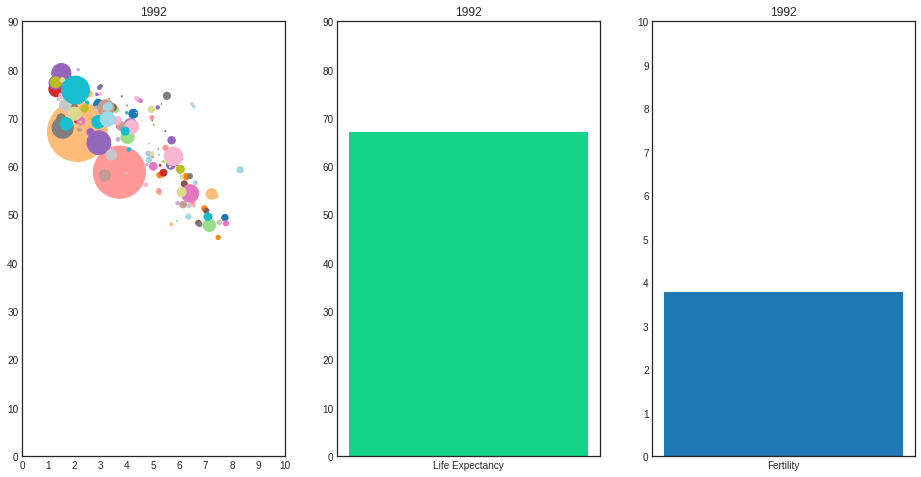

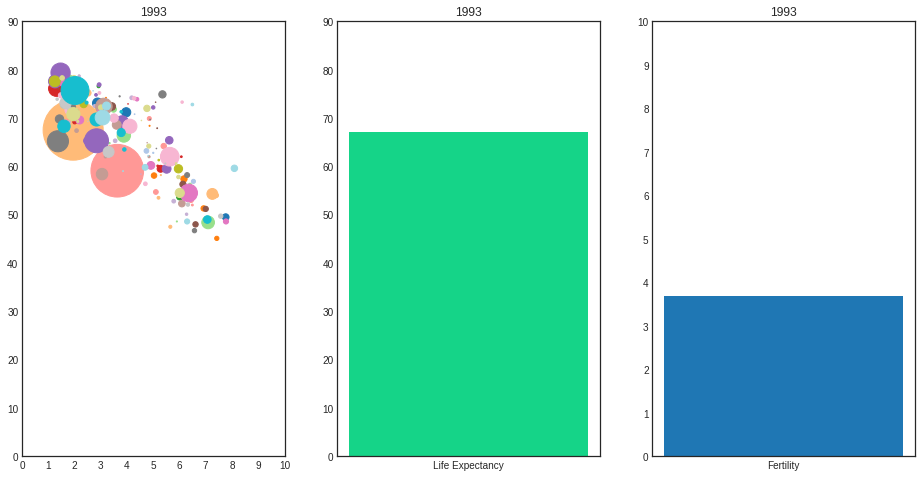

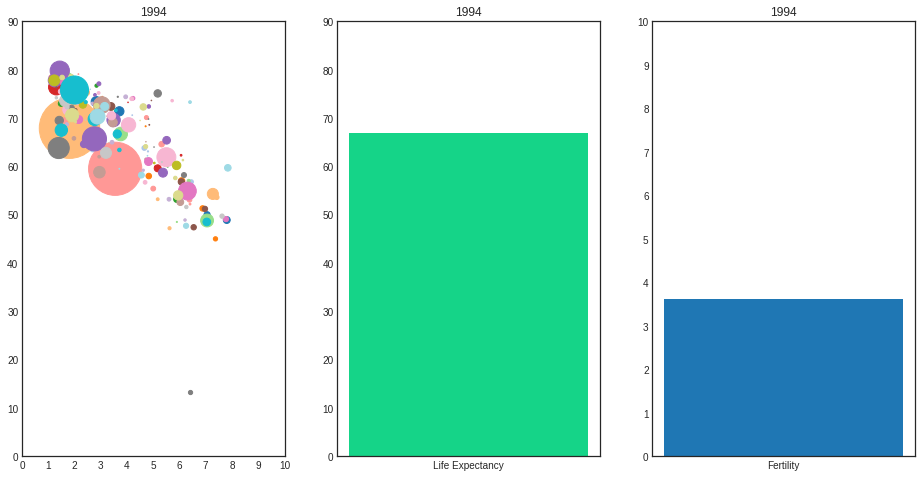

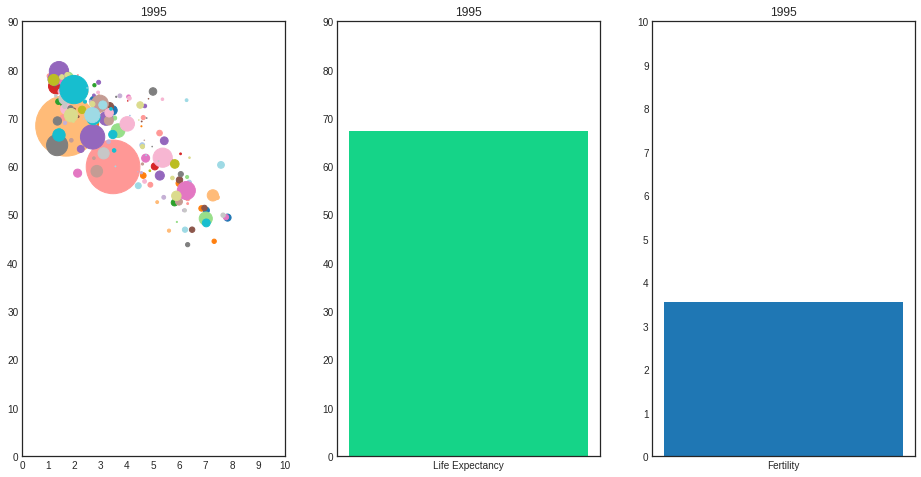

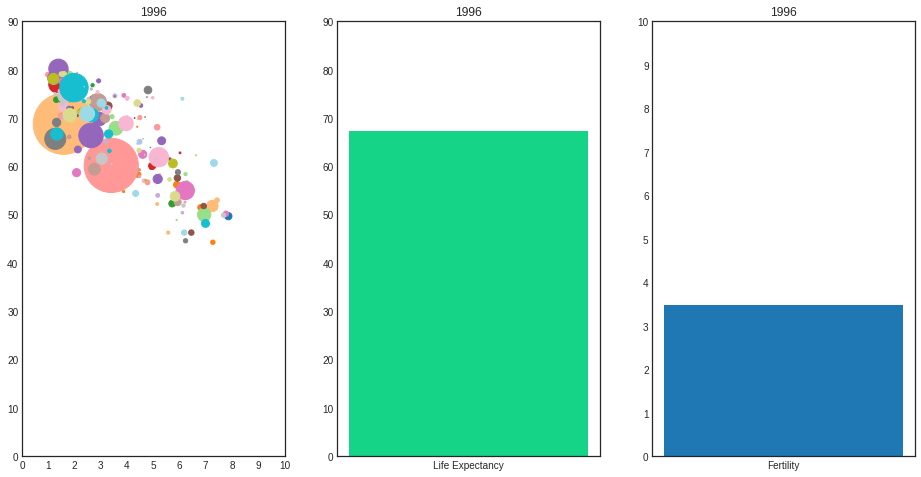

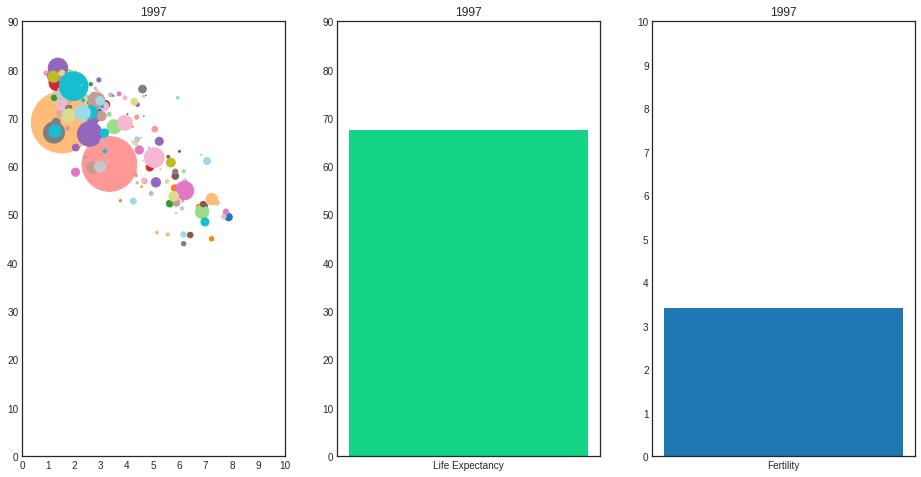

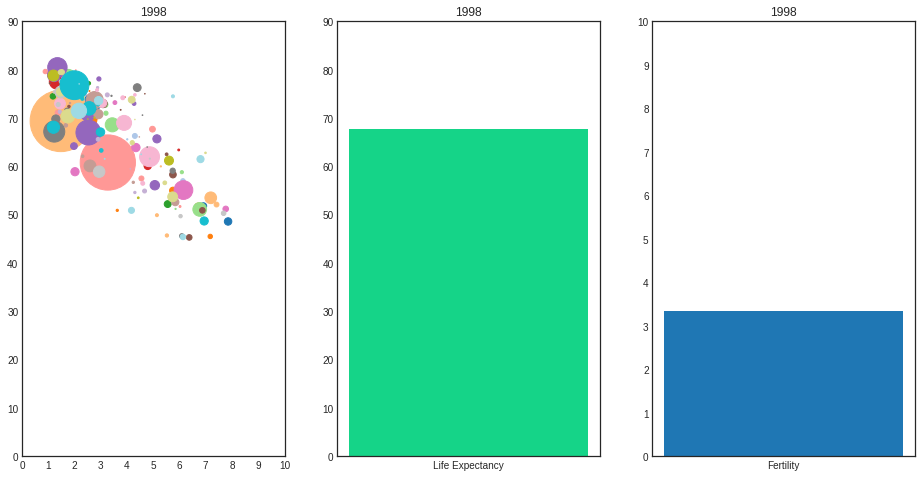

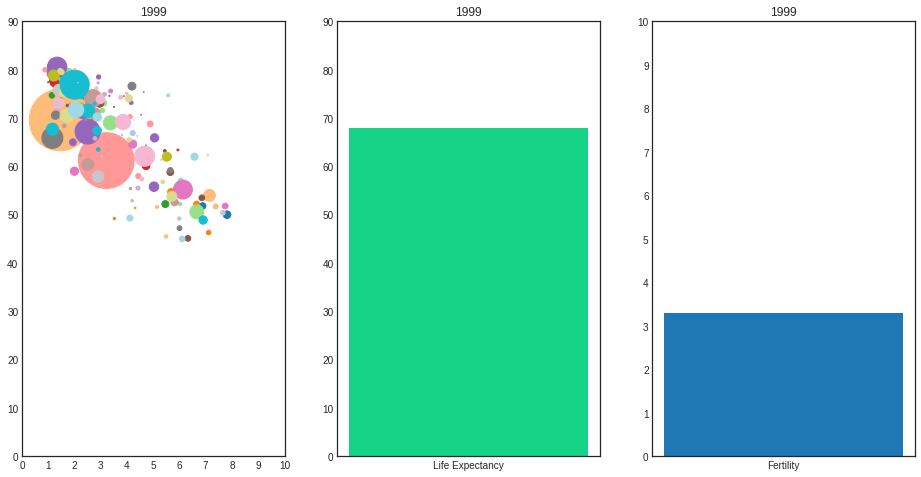

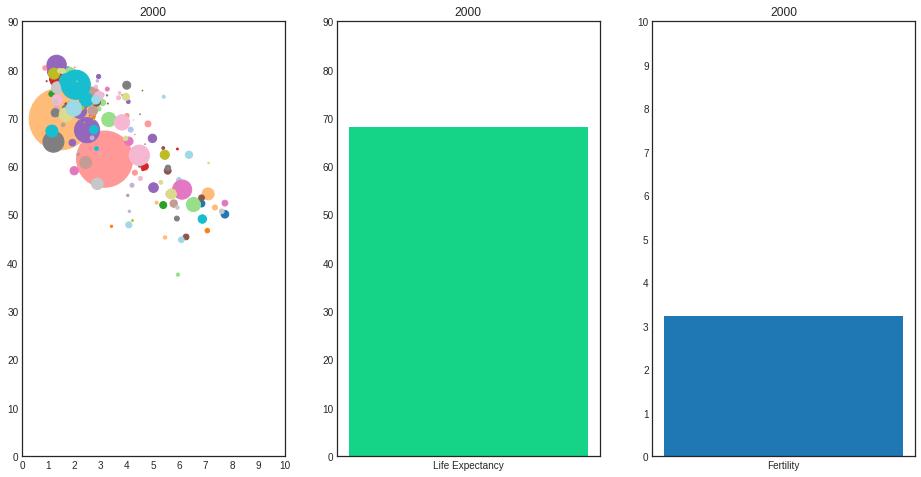

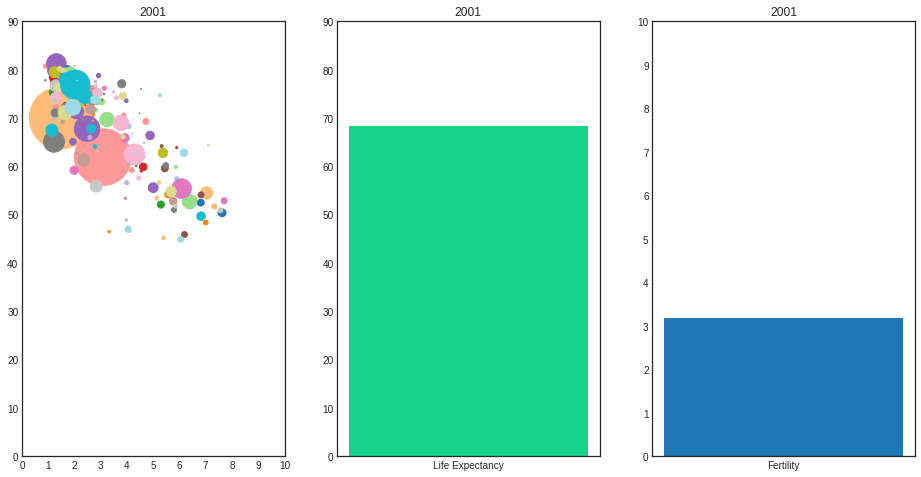

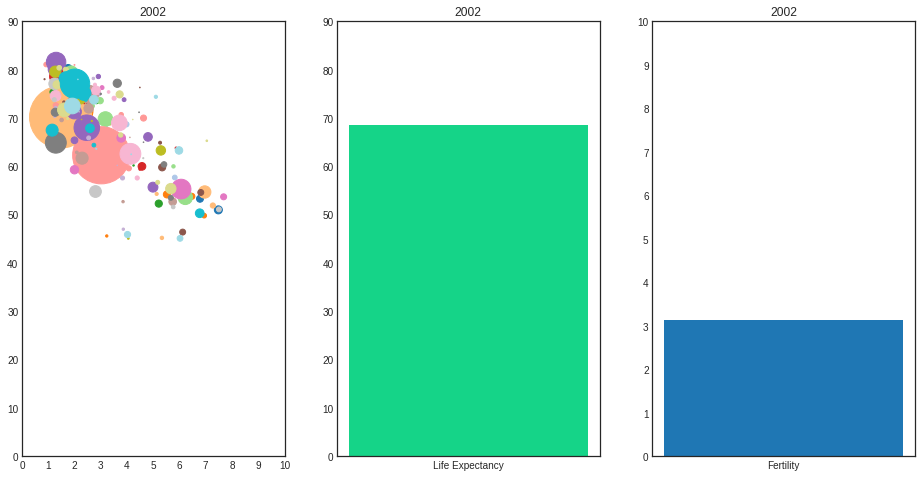

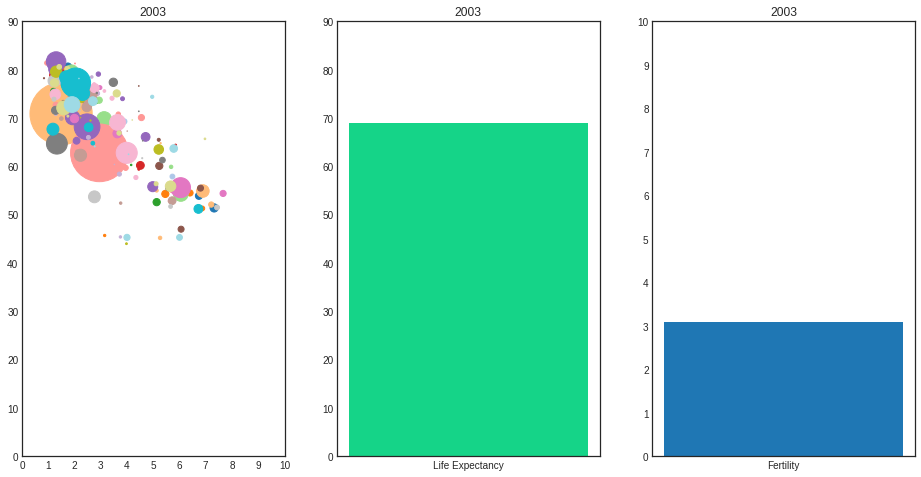

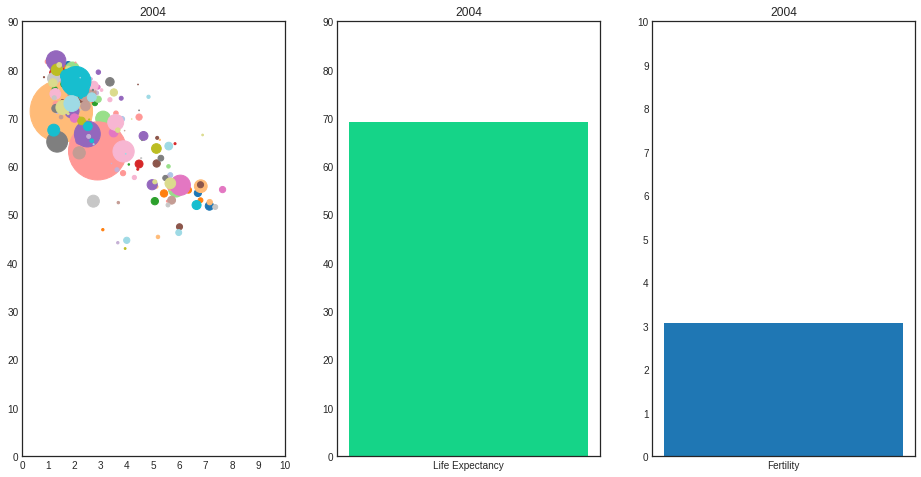

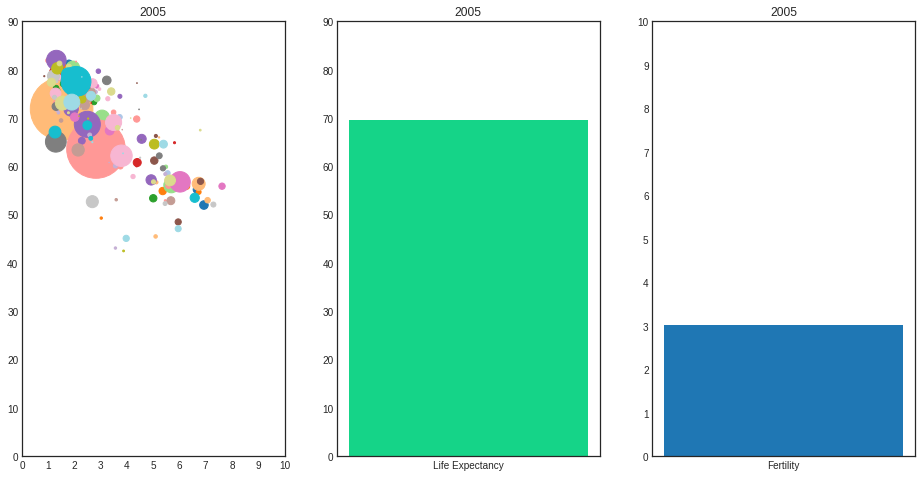

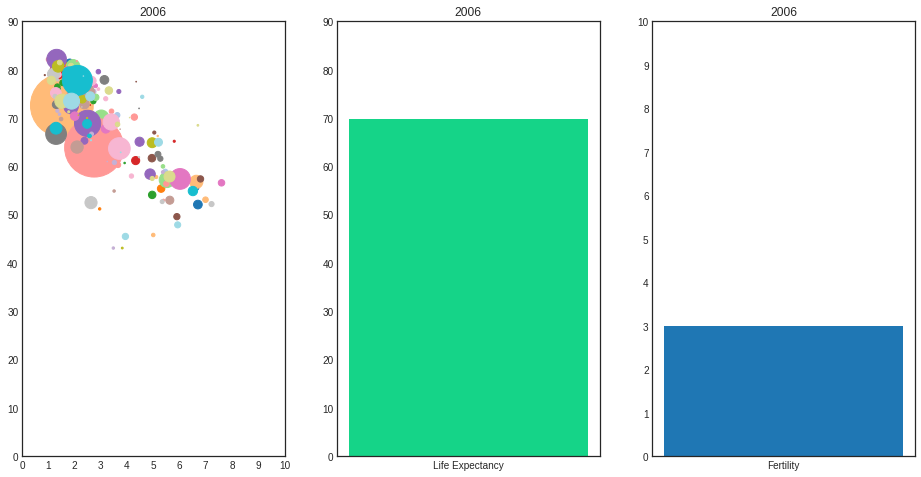

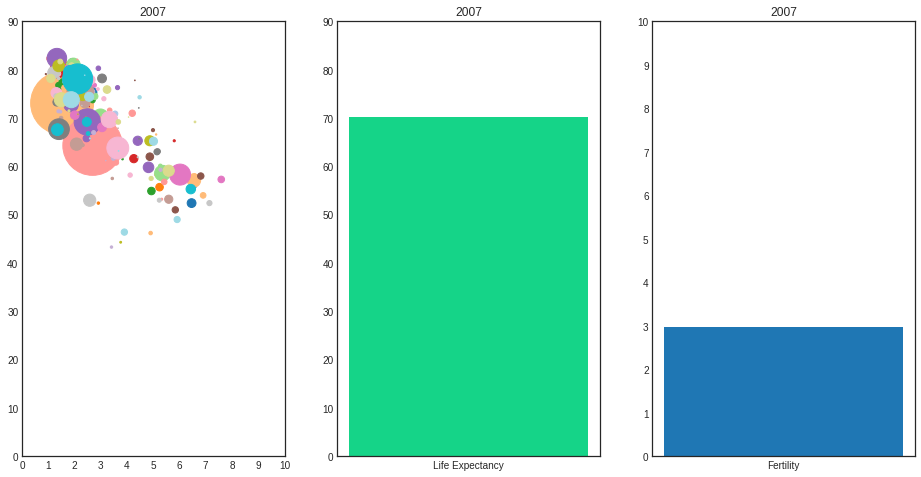

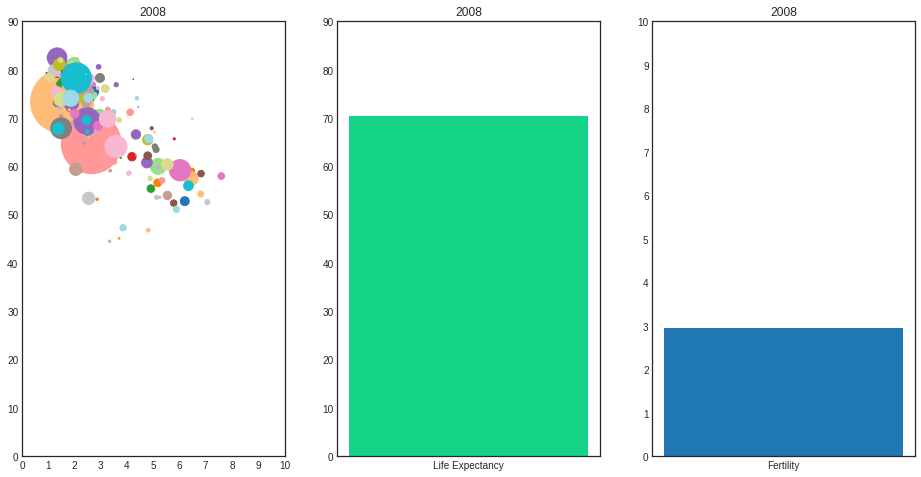

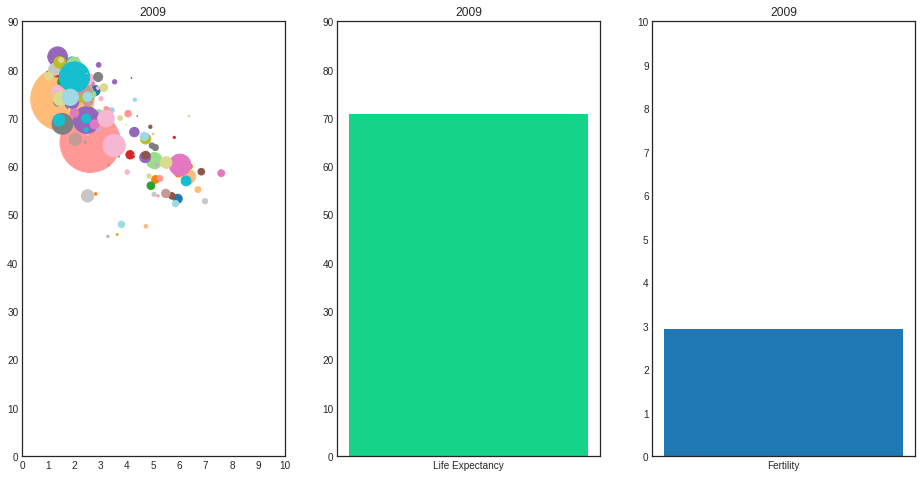

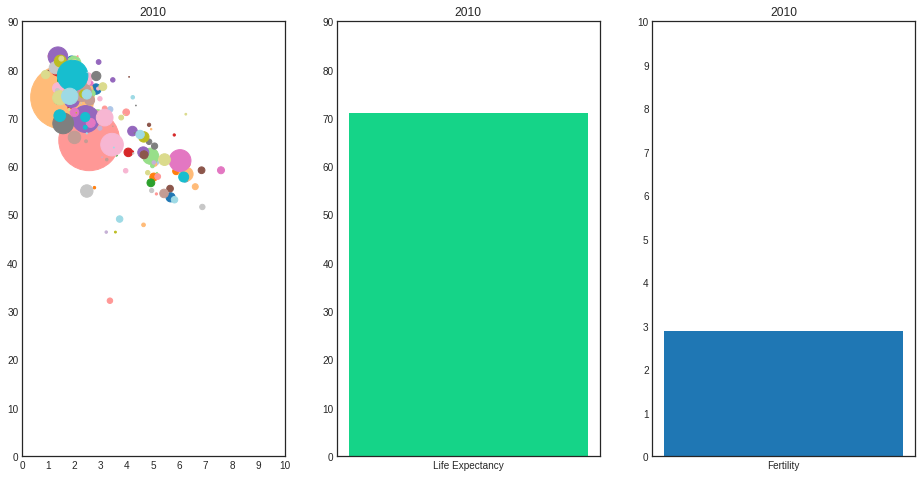

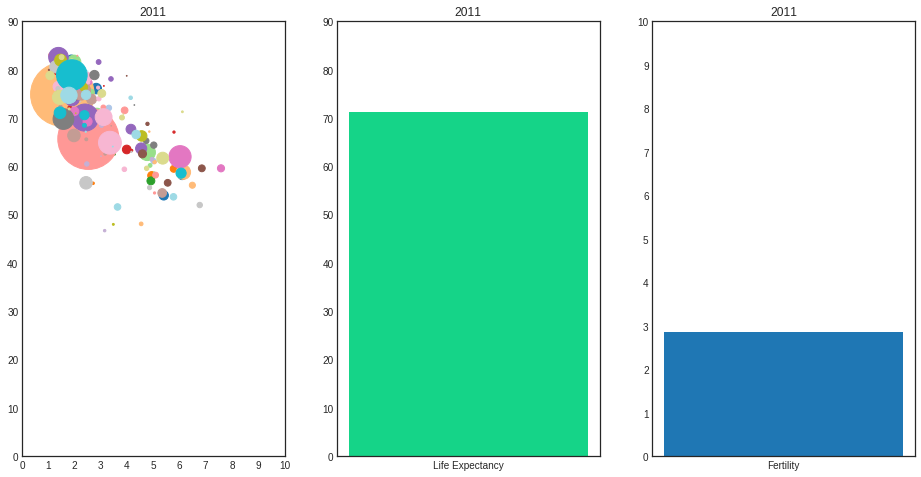

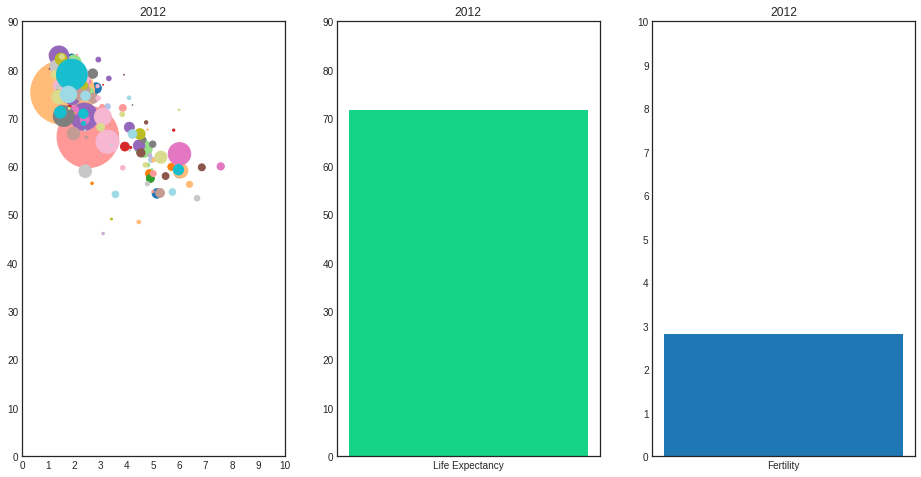

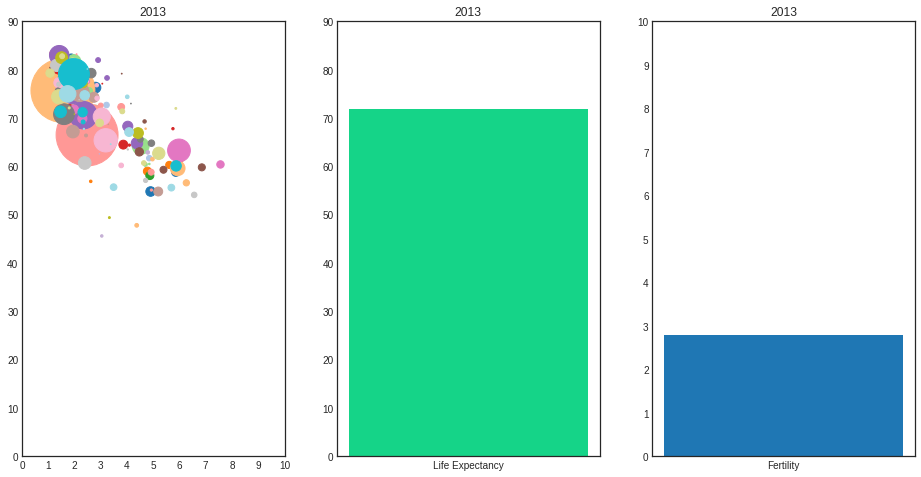

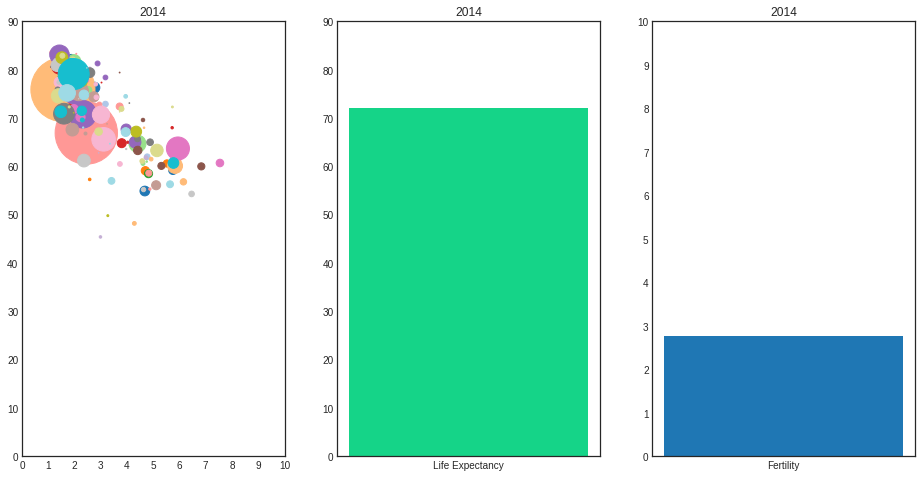

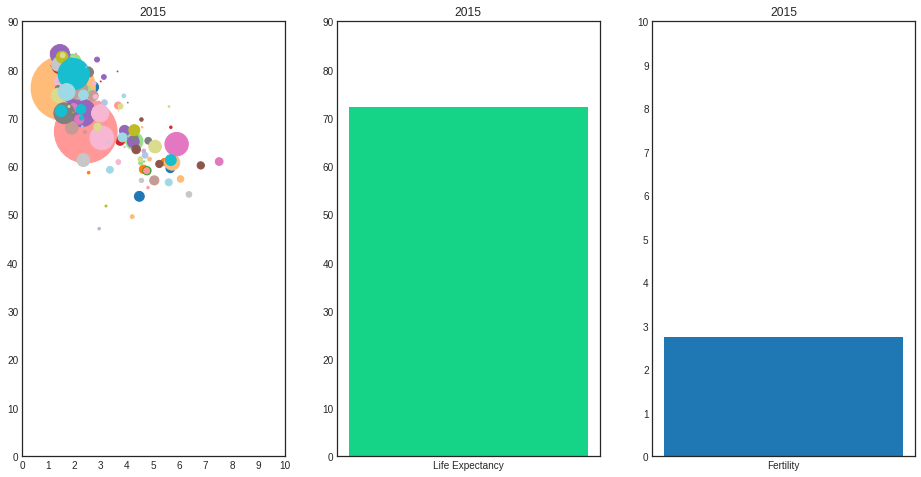

In [9]:
# multiplot for years 1960 - 2015

import pylab as plt

plt.style.use('seaborn-white')


temp_df = df2.unstack(1)

for i in range(1960, 2016):
    new_df = temp_df[i]
    new_df = new_df.unstack(1)
    l_mean = new_df['lifeexp'].mean()
    f_mean = new_df['fertility'].mean()

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8)) # Create empty figure with 1x3 grid
    
    # useful link for all functions regarding axes -> https://matplotlib.org/3.2.1/api/axes_api.html#matplotlib.axes.Axes
    
    # scatterplot
    cmap = plt.get_cmap('tab20', lut = len(new_df)).colors
    ax1.scatter(x=new_df['fertility'], y=new_df['lifeexp'], s=new_df['pop_in_mill'] * 3, c=cmap)
    ax1.set_title(f'{i}') # Add year to title
    ax1.set_xticks(list(range(0, 11))) # Fix ticks, so they don't jump around
    ax1.set_yticks(list(range(0, 100, 10))) # Fix ticks
    
    # middle barplot
    ax2.bar('Life Expectancy', l_mean, color='#15d488')
    ax2.set_title(f'{i}')
    ax2.set_yticks(list(range(0, 100, 10)))
    
    # right barplot
    ax3.bar('Fertility', f_mean)
    ax3.set_title(f'{i}')
    ax3.set_yticks(list(range(0, 11)))

    plt.savefig(f'multiplot_images/{i}.png')

In [10]:
# make gif

import imageio

images = []

for i in range(1960, 2016):
    filename = 'multiplot_images/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output_mult.gif', images, fps=15)